In [1]:
%matplotlib inline
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.models import Model, Sequential
from keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from keras.utils import layer_utils
from keras import backend as K
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard, CSVLogger
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score
import keras
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications import xception
from keras.applications import inception_v3
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [ ]:

model = ResNet50(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

In [3]:
x = model.output
x = Flatten()(x)
x=Dropout(0.25)(x)
x=Dense(units=1000,activation='relu')(x)
x=Dropout(0.25)(x)
x=Dense(units=750,activation='relu')(x)
x=Dropout(0.25)(x)
x=Dense(units=750,activation='relu')(x)
x=Dropout(0.25)(x)
x=Dense(units=750,activation='relu')(x)
x=Dropout(0.25)(x)
x=Dense(units=1000,activation='relu')(x)
x=Dropout(0.6)(x)

predictions = Dense(120, activation='softmax')(x)

In [4]:

main_model = Model(inputs=model.input, outputs=predictions)

for curLayer in model.layers:
    curLayer.trainable = False

main_model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
main_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D) (None, 230, 230, 3)   0           input_1[0][0]                    
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 112, 112, 64)  9472        zero_padding2d_1[0][0]           
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 64)  256         conv1[0][0]                      
___________________________________________________________________________________________

In [5]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(
        '/training_images',
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        '/validation_images',
        target_size=(224, 224),
        batch_size=22,
        class_mode='categorical')

hist=main_model.fit_generator(
        training_set,
        steps_per_epoch=400,
        epochs=25,
        validation_data=test_set,
        validation_steps=101,callbacks=callbacks_list)

Found 8000 images belonging to 120 classes.
Found 2222 images belonging to 120 classes.
Epoch 1/25
400/400 [==============================] - 124s - loss: 4.7287 - acc: 0.0161 - val_loss: 5.0008 - val_acc: 0.0099
Epoch 2/25
400/400 [==============================] - 122s - loss: 4.2519 - acc: 0.0430 - val_loss: 4.1853 - val_acc: 0.0500
Epoch 3/25
400/400 [==============================] - 122s - loss: 3.8933 - acc: 0.0781 - val_loss: 3.3931 - val_acc: 0.1535
Epoch 4/25
400/400 [==============================] - 122s - loss: 3.6033 - acc: 0.1138 - val_loss: 3.0882 - val_acc: 0.1890
Epoch 5/25
400/400 [==============================] - 122s - loss: 3.3809 - acc: 0.1501 - val_loss: 2.7338 - val_acc: 0.2475
Epoch 6/25
400/400 [==============================] - 122s - loss: 3.2743 - acc: 0.1676 - val_loss: 2.7401 - val_acc: 0.2628
Epoch 7/25
400/400 [==============================] - 122s - loss: 3.1889 - acc: 0.1785 - val_loss: 2.6167 - val_acc: 0.2790
Epoch 8/25
400/400 [=================

In [6]:

test_set = []
test_set_ids = []
for curImage in os.listdir('/test_images'):
    test_set_ids.append(os.path.splitext(curImage)[0])
    curImage = cv2.imread('/test_images/'+curImage)
    test_set.append(cv2.resize(curImage,(224, 224)))
    
test_set = np.array(test_set, np.float32)/255.0

predictions= main_model.predict(test_set)

In [7]:
training_set.class_indices

{'affenpinscher': 0,
 'afghan_hound': 1,
 'african_hunting_dog': 2,
 'airedale': 3,
 'american_staffordshire_terrier': 4,
 'appenzeller': 5,
 'australian_terrier': 6,
 'basenji': 7,
 'basset': 8,
 'beagle': 9,
 'bedlington_terrier': 10,
 'bernese_mountain_dog': 11,
 'black-and-tan_coonhound': 12,
 'blenheim_spaniel': 13,
 'bloodhound': 14,
 'bluetick': 15,
 'border_collie': 16,
 'border_terrier': 17,
 'borzoi': 18,
 'boston_bull': 19,
 'bouvier_des_flandres': 20,
 'boxer': 21,
 'brabancon_griffon': 22,
 'briard': 23,
 'brittany_spaniel': 24,
 'bull_mastiff': 25,
 'cairn': 26,
 'cardigan': 27,
 'chesapeake_bay_retriever': 28,
 'chihuahua': 29,
 'chow': 30,
 'clumber': 31,
 'cocker_spaniel': 32,
 'collie': 33,
 'curly-coated_retriever': 34,
 'dandie_dinmont': 35,
 'dhole': 36,
 'dingo': 37,
 'doberman': 38,
 'english_foxhound': 39,
 'english_setter': 40,
 'english_springer': 41,
 'entlebucher': 42,
 'eskimo_dog': 43,
 'flat-coated_retriever': 44,
 'french_bulldog': 45,
 'german_shepherd'

In [8]:
classes= {index:breed for breed,index in training_set.class_indices.items()}
column_names = [classes[i] for i in range(120)]
column_names

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenendael',


In [9]:
predictions_df = pd.DataFrame(predictions)
predictions_df.columns = column_names
predictions_df.insert(0,'id', test_set_ids)
predictions_df.set_index('id',inplace=True)
predictions_df

affenpinscher  afghan_hound  \
id                                                              
8935ed11d71e8b349b010f715a1a790c   7.463816e-06  2.046892e-06   
61d51637c3d950cf0a188cd536f53c87   2.411973e-02  5.220759e-03   
16cd0ecab645b8d0629296fe0ee728f0   4.910438e-04  1.195453e-02   
ad4870ec4771509b1562a33743621d03   1.112336e-03  2.871763e-03   
34cc85bcee5d753514001575e6157c6e   7.718413e-04  5.357775e-04   
c32b7011abbab8b878c9c507ec3d3ff3   3.063628e-04  5.309489e-04   
fb05fd17b96a9d33288691701da2dffd   9.025753e-04  4.559594e-04   
e443bb594a89ab5fa1266748d6b41648   1.144173e-02  1.337360e-02   
8ffb64ee0970306a0b01f7a2a8da73eb   1.457666e-04  2.528805e-04   
63eea3e782e38d83f748bfd08389ce28   3.052922e-03  1.646034e-02   
972060944d0f4c4e342eea4aad3a017a   3.308205e-09  1.550510e-05   
93af520fcf77bcf0b432896c7cedfe6c   3.949748e-05  4.219802e-03   
3d1e28e268735f53b66138aef843996b   1.310019e-04  7.515749e-05   
4f313c979bc728070fb16bc32c9ca77c   1.167498e-03  8.184525e-03   
b01e1f5586916a181bf4455cedba55d8   7.873756e-03  6.297701e-03   
e55fa0c818f485f8e36edfb464c4f129   2.127442e-03  2.379691e-04   
e4e57083c3b68e91760ce6f5fcd0a2f9   6.786570e-04  1.346239e-03   
a5a89afb607f1d28aa26f74d924b6efa   1.669267e-04  5.470497e-04   
36bbd6dc5e0fc7485cb5c6b3285cbb97   5.036122e-01  1.533518e-03   
8ae10e59bf4a2fe7f3f83cbb85fcac29   5.154448e-04  2.839982e-04   
1c8639b16f4080e1f1a107dc9d5d0391   3.464060e-03  2.108239e-03   
e721c3eec5951861bf3ed7f40ef8b091   3.150519e-05  1.929086e-02   
6d08cad46028311c98717d3865c466b6   1.530393e-15  2.822534e-14   
b1cd742b8e651699372c104b0ee50ce0   3.088783e-03  1.371700e-02   
b00081f031f0b6a462f83a3a6f52b55e   5.149958e-03  9.842300e-02   
1e4f5a8f7210a6c6dc099553b945797f   2.542272e-03  1.248754e-04   
a522fd540618c70063964301e50b7134   3.131964e-05  2.381274e-06   
c7941514534054adcd875cd8d5bc33be   3.859104e-02  1.456019e-03   
a1274c19077dbf829afbbab82e24f237   1.410424e-01  3.859108e-03   
77b8f03c467503121a1f0be727b90538   2.060507e-04  5.232041e-03   
...                                         ...           ...   
da2301f3852be51871c34132fbbc2c9d   1.348952e-03  9.694759e-04   
b0b6c18ccb0aa7b27020fc9063daef57   1.408123e-04  2.086084e-03   
88fd983a3e819719a7ef1a690d72a53d   1.014947e-10  1.348959e-09   
acb521ade5e146aee2257336d49c57b8   4.529024e-05  3.493338e-03   
a10f9465bba196e25b011b95aea8c68c   2.015968e-04  2.137437e-04   
dc230ceb40821adda5cbdd8ae80b9418   5.531834e-04  1.332310e-03   
f645e45c994e1eea2e6090ba8c583fc1   9.462301e-04  2.861884e-02   
86475c1242c3f2ec067ff34c451097d5   3.301844e-05  1.061964e-05   
77fbc571d85238151072c9ef7d0f4c9e   8.346348e-05  1.916639e-02   
136c4388809b3854c866a81a85bcc4ca   1.486695e-02  1.302742e-03   
02ad3d182823ba4055223ab2cf7d2ef9   1.274277e-05  1.979265e-05   
f02b0bb575f8dd86c63ab38df20483ba   5.510909e-06  1.733377e-06   
9feec66fed6fffc8139af290c04244b8   2.432693e-02  3.711762e-03   
18cf06b0c6a59c6891bf6f5a42bcc73d   7.902583e-03  2.163545e-04   
11ef436b9b2fcafb39fa824d6b9511d0   1.749560e-06  5.881451e-08   
12de4497b6e8192acf57ece5594307af   6.174361e-04  3.827925e-03   
48c28031abfec1f80d1e1cbbc064d9d5   1.025159e-05  1.745580e-02   
51595f361cbcfc4b86856c0c86670bf8   2.402530e-03  1.191646e-03   
923eb48d9473687da0749e5132d1cd7c   9.355340e-05  5.825019e-06   
f9068d19af55c183e80afa192fcb0f85   7.687572e-05  2.143459e-04   
834f6aaff5dd8f7159bc3c9afeaaead7   3.102375e-03  8.976364e-03   
71ebb0c1014b1475b62a30aef8c31e98   2.712709e-05  7.394838e-07   
93f27a94cf69f02c3b96489adc279249   4.671546e-05  2.389506e-05   
0d2eabeabab223d84cc00ffa8aacd16d   5.141101e-03  2.040568e-02   
dcd3cfe0cd6d363a3ed21639c434c8d3   1.483433e-04  2.580043e-04   
3407f5f08f680403233081e250a9eb17   6.451731e-04  3.427149e-03   
99cc4f815762a17fb345d352028956b5   1.139807e-04  1.547439e-05   
932a84f32f532c59ee57129edd6e299a   9.268988e-05  1.158833e-02   
45f035f3a5bf665ba52b74c7ebeb206e   4.623155e-03  1.235525e-04   
4bc6

In [10]:
predictions_df.to_csv('/output/final_submission.csv',sep=",")

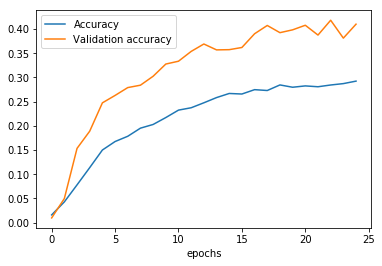

In [13]:
plt.plot(hist.history['acc'],label="Accuracy")
plt.plot(hist.history['val_acc'], label="Validation accuracy")
plt.legend()
plt.xlabel('epochs')
plt.show()

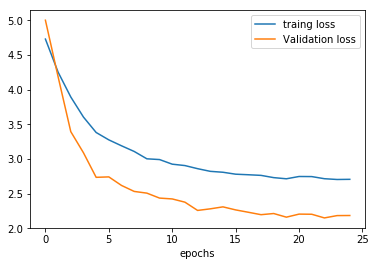

In [14]:
plt.plot(hist.history['loss'],label="traing loss")
plt.plot(hist.history['val_loss'], label="Validation loss")
plt.legend()
plt.xlabel('epochs')
plt.show()